# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import joblib

import import_ipynb

import data_preprocessing
import input_preprocessing
import output_preprocessing
import evaluation_methods as eval_ms
import models


data = data_preprocessing.Data(tags_or_genres='genres', min_label_occ=50)



# Calculating

## Compare all evaluation methods
(using TF-IDF and logistic regression)

In [ ]:
X = input_preprocessing.tfidf(data.games['description'], max_features=10000)
y = output_preprocessing.multilabel_binarizer(data.games['genres'])

eval_names = ['recall', 'jaccardscore', 'exactmatch', 'hammingloss', 'f1score']
eval_methods = [eval_ms.recall, eval_ms.jaccardscore, eval_ms.exactmatch, eval_ms.hammingloss, eval_ms.f1score]
evaluations = []
eval_history = []

for evaluate in eval_methods:
    model = models.LogisticRegression(X, y, evaluate, max_iter=20)
    model.fit()
    evaluations.append(model.evaluate())
    eval_history.append(model.history_)

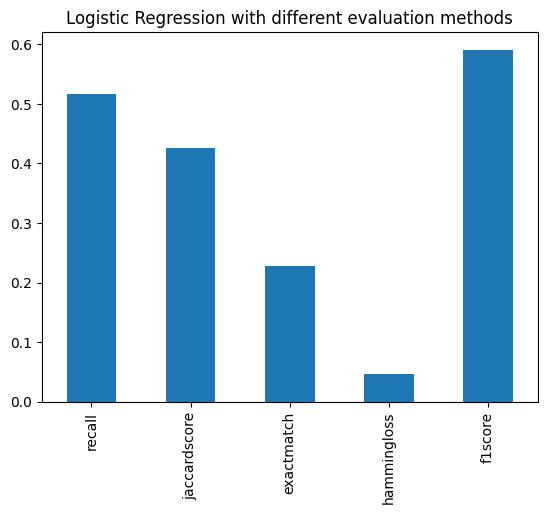

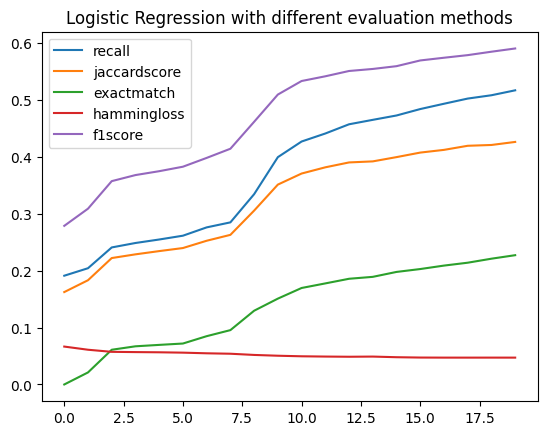

In [3]:
eval_df = pd.DataFrame(evaluations, index=eval_names)
eval_df.plot(kind='bar', legend=False)
plt.title('Logistic Regression with different evaluation methods')
plt.show()

for history in eval_history:
    plt.plot(history)
plt.legend(eval_names)
plt.title('Logistic Regression with different evaluation methods')
plt.show()

## Compare all models
(using TF-IDF and f1score)

In [2]:
X = input_preprocessing.tfidf(data.games['description'], max_features=10000)
y = output_preprocessing.multilabel_binarizer(data.games['genres'])

evaluation = eval_ms.f1score
model_names = []
evaluations = []

In [3]:
model = models.LogisticRegression(X, y, evaluation, max_iter=30)
model.fit()
model_names.append('LR')
evaluations.append(model.evaluate())

In [4]:
model = models.KNN(X, y, evaluation)
model.fit()
model_names.append("KNN")
evaluations.append(model.evaluate())

In [5]:
model = models.DecisionTree(X, y, evaluation)
model.fit()
model_names.append("DT")
evaluations.append(model.evaluate())

In [6]:
model = models.RandomForest(X, y, evaluation)
model.fit()
model_names.append("RF")
evaluations.append(model.evaluate())

In [7]:
model = models.NaiveBayes(X, y, evaluation)
model.fit()
model_names.append("NB")
evaluations.append(model.evaluate())

In [ ]:
model = models.SVM(X, y, evaluation)
model.fit()
model_names.append("SVM")
evaluations.append(model.evaluate())

KeyboardInterrupt: 

In [8]:
model = models.MLP(X, y, evaluation)
model.fit()
model_names.append("MLP")
evaluations.append(model.evaluate())

C:\Users\patry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\patry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\patry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\patry\AppData

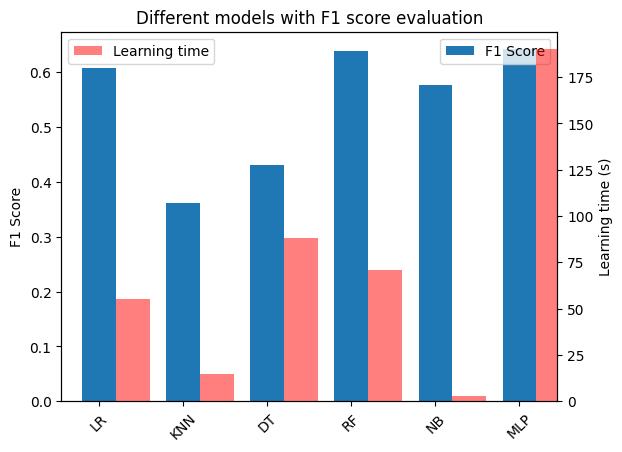

In [35]:
learn_times = []
for i in range(len(model_names)):
    learn_times.append(0)
learn_times[model_names.index('LR')] = 55
learn_times[model_names.index('KNN')] = 15
learn_times[model_names.index('DT')] = 60 + 28
learn_times[model_names.index('RF')] = 60 + 11
learn_times[model_names.index('NB')] = 3
# learn_times[model_names.index('SVM')] = 60 + 10
learn_times[model_names.index('MLP')] = 3*60 + 10




eval_df = pd.DataFrame(evaluations, index=model_names)
fig, ax1 = plt.subplots()

eval_df.plot(kind='bar', legend=False, ax=ax1, position=0, width=0.4)
ax1.set_ylabel('F1 Score')
ax1.legend(['F1 Score'], loc='upper right')

ax2 = ax1.twinx()
ax2.bar(np.arange(len(model_names)) + 0.6, learn_times, alpha=0.5, color='r', width=0.4)
ax2.set_ylabel('Learning time (s)')
ax2.legend(['Learning time'], loc='upper left')

ax1.set_xticks(np.arange(len(model_names)) + 0.2)
ax1.set_xticklabels(model_names, rotation=45)


plt.title('Different models with F1 score evaluation')
plt.show()

## Plot trained decision tree
(TF-IDF f1score)

[Text(0.5, 0.9, 'x[7652] <= 0.013\ngini = 0.1\nsamples = 40216\nvalue = [[40098.0, 118.0]\n[33657.0, 6559.0]\n[33133.0, 7083.0]\n[39827.0, 389.0]\n[37951.0, 2265.0]\n[39981.0, 235.0]\n[38516.0, 1700.0]\n[39284.0, 932.0]\n[40017.0, 199.0]\n[19574.0, 20642.0]\n[39265.0, 951.0]\n[40099.0, 117.0]\n[32615.0, 7601.0]\n[39139.0, 1077.0]\n[33153.0, 7063.0]\n[40026.0, 190.0]\n[38521.0, 1695.0]\n[32309.0, 7907.0]\n[39905.0, 311.0]\n[40049.0, 167.0]\n[39546.0, 670.0]\n[23649.0, 16567.0]\n[40167.0, 49.0]\n[33130.0, 7086.0]\n[39937.0, 279.0]\n[40033.0, 183.0]\n[34198.0, 6018.0]\n[39771.0, 445.0]\n[40155.0, 61.0]\n[39928.0, 288.0]\n[40035.0, 181.0]\n[35654.0, 4562.0]\n[40146.0, 70.0]\n[39139.0, 1077.0]\n[39829.0, 387.0]\n[38329.0, 1887.0]\n[40160.0, 56.0]\n[39493.0, 723.0]\n[40096.0, 120.0]\n[40157.0, 59.0]]'),
 Text(0.25, 0.7, 'x[9750] <= 0.018\ngini = 0.1\nsamples = 39415\nvalue = [[39297.0, 118.0]\n[32856.0, 6559.0]\n[32332.0, 7083.0]\n[39026.0, 389.0]\n[37153.0, 2262.0]\n[39180.0, 235.0]\n[37717

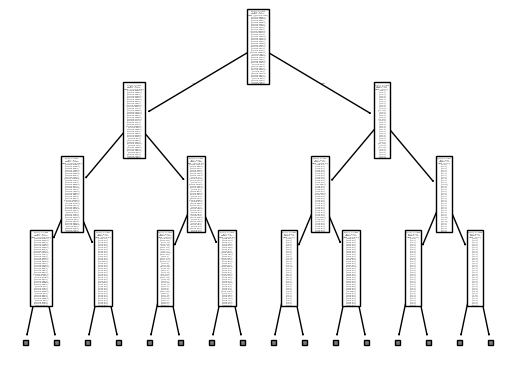

In [13]:
from sklearn import tree

X = input_preprocessing.tfidf(data.games['description'], max_features=10000)
y = output_preprocessing.multilabel_binarizer(data.games['genres'])


model = models.DecisionTree(X, y, eval_ms.f1score)
model.fit()

tree.plot_tree(model.tree, max_depth=3)

# Data visualization
Play with the input data

In [41]:
X = input_preprocessing.bag_of_words(data.games['description'], max_features=10000)
y = output_preprocessing.multilabel_binarizer(data.games['genres'])

### PCA analysis

(50271, 300)
[0.05741529 0.0397974  0.0318256  0.01713116 0.01627004 0.00937498
 0.00890458 0.00713429 0.00686049 0.00534869 0.00524397 0.00508213
 0.00475013 0.00440818 0.00422169 0.00408337 0.00391275 0.003773
 0.00369854 0.0035575  0.00351334 0.00344212 0.00337171 0.00329877
 0.00316577 0.00300925 0.00294411 0.00283518 0.00272984 0.00267074
 0.00259571 0.0025375  0.00251864 0.00243772 0.00241046 0.00232247
 0.00230548 0.00224921 0.00222539 0.00220286 0.002197   0.00216969
 0.00209835 0.00207751 0.00204379 0.0019902  0.00195778 0.0019218
 0.00190108 0.00186535 0.00185282 0.001825   0.0018022  0.00178316
 0.00175438 0.00172924 0.0017231  0.00169539 0.00167284 0.00166255
 0.00164649 0.0016207  0.00161452 0.00159315 0.00158406 0.00155932
 0.00154477 0.00152652 0.00150613 0.00148395 0.00147016 0.00145431
 0.00144005 0.00142351 0.001409   0.0013967  0.00137975 0.00136927
 0.00135652 0.0013515  0.00134356 0.00131516 0.00130275 0.0012884
 0.00128671 0.00128142 0.00127723 0.00125071 0.001243

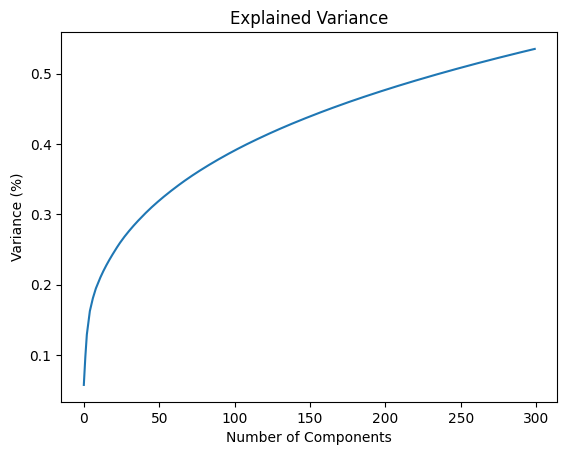

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=300)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

# print pca analysis
print(pca.explained_variance_ratio_)
# print(pca.singular_values_)

# plot
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()


### t-SNE analysis

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 50271 samples in 0.144s...
[t-SNE] Computed neighbors for 50271 samples in 9.006s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50271
[t-SNE] Computed conditional probabilities for sample 2000 / 50271
[t-SNE] Computed conditional probabilities for sample 3000 / 50271
[t-SNE] Computed conditional probabilities for sample 4000 / 50271
[t-SNE] Computed conditional probabilities for sample 5000 / 50271
[t-SNE] Computed conditional probabilities for sample 6000 / 50271
[t-SNE] Computed conditional probabilities for sample 7000 / 50271
[t-SNE] Computed conditional probabilities for sample 8000 / 50271
[t-SNE] Computed conditional probabilities for sample 9000 / 50271
[t-SNE] Computed conditional probabilities for sample 10000 / 50271
[t-SNE] Computed conditional probabilities for sample 11000 / 50271
[t-SNE] Computed conditional probabilities for sample 12000 / 50271
[t-SNE] Computed conditional probabilities for sa

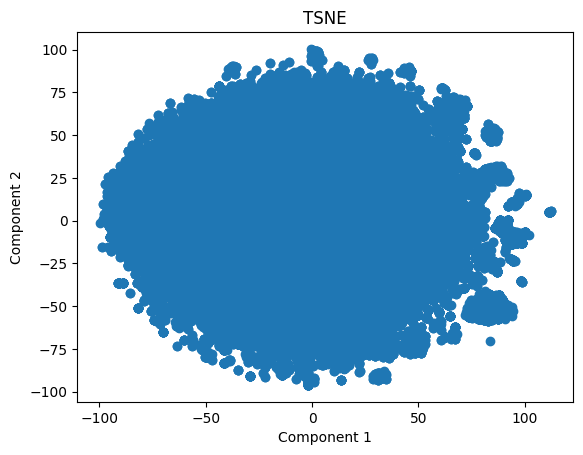

In [47]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, max_iter=1000)
X_tsne = tsne.fit_transform(X_pca)
print(X_tsne.shape)

# plot
plt.figure()
plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('TSNE')
plt.show()

## Linear regression regularization

In [3]:
X = input_preprocessing.bag_of_words(data.games['description'], max_features=10000)
y = output_preprocessing.multilabel_binarizer(data.games['genres'])

In [15]:
model_def_none = models.LogisticRegression(X, y, eval_ms.f1score, max_iter=50, regularization=None)
model_def_none.fit()

In [16]:
model_def_l2 = models.LogisticRegression(X, y, eval_ms.f1score, max_iter=50, regularization='l2')
model_def_l2.fit()

In [4]:
model_none = models.LogisticRegression(X, y, eval_ms.f1score, max_iter=30, regularization=None, solver='saga')
model_none.fit()

In [ ]:
model_l1 = models.LogisticRegression(X, y, eval_ms.f1score, max_iter=30, regularization='l1', solver='saga')
model_l1.fit()

KeyboardInterrupt: 

In [13]:
model_l2 = models.LogisticRegression(X, y, eval_ms.f1score, max_iter=30, regularization='l2', solver='saga')
model_l2.fit()

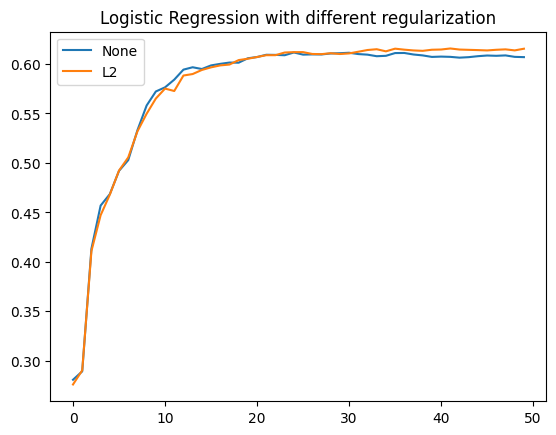

In [21]:
eval_names = ['None', 'L2']
# history = [model_none.history_, model_l2.history_]
# eval_names = ['None', 'L2']
history = [model_def_none.history_, model_def_l2.history_]

for i in range(len(eval_names)):
    plt.plot(history[i])
plt.legend(eval_names)
plt.title('Logistic Regression with different regularization')
plt.show()